In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df=pd.read_csv("Google_Stock_Price_Train.csv")

In [28]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [29]:
df.shape

(1258, 6)

In [30]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
df.iloc[:,4:5].values.shape

(1258, 1)

In [7]:
df.shape

(1258, 6)

In [31]:
def check(df3):
    print(df.dtypes)

In [32]:
check(df)

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object


In [10]:
df["Close"][451]

'1,008.64'

In [33]:

s = '1,0.123'
f = float(s.replace(',',''))
f

10.123

In [34]:
new_df = df["Close"].apply(lambda x : float(x.replace(',','')))

In [35]:
df["Close"]=new_df.astype(float)


In [36]:
check(df)

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object


In [37]:
df1=df.iloc[:,4:5].values
df1

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [38]:
# we need to take min max scalar from the sciket learn to put that values to 
#the 0 to 1 range

from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(df1)
df1

array([[0.23757287],
       [0.24151427],
       [0.22878051],
       ...,
       [0.40495845],
       [0.40184391],
       [0.38672602]])

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

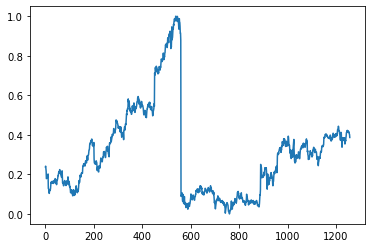

In [40]:
plt.plot(df1)

In [19]:
#converting the string to int


#df6=pd.to_numeric(df.Close)

#df6['Close'] = pd.to_numeric(df['Close'])


df['Close'] = df['Close'].str.replace('.','', regex=True).str.replace(',', '.', regex=True).astype(float)


AttributeError: Can only use .str accessor with string values!

In [ ]:
# for the time serious data we need to u


In [20]:
df1=df["Close"]

In [21]:
df1.head()

0    663.59
1    666.45
2    657.21
3    648.24
4    620.76
Name: Close, dtype: float64

In [41]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [42]:
training_size,test_size

(817, 441)

#  convert an array of values into a dataset matrix

In [43]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])  # over here the 100 value saved
	return numpy.array(dataX), numpy.array(dataY)

In [44]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [45]:
print("For Train: ",X_train.shape, y_train.shape)
print("For Test: ",X_test.shape, ytest.shape)


For Train:  (716, 100) (716,)
For Test:  (340, 100) (340,)


In [46]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [48]:
print("For Train: ",X_train.shape, y_train.shape)
# for lstm

For Train:  (716, 100, 1) (716,)


# Stacked LSTM model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-03-14 21:51:10.029111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

2023-03-14 21:51:47.308262: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [52]:

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=2)


Epoch 1/100
12/12 - 1s - loss: 0.0028 - val_loss: 6.0021e-04 - 1s/epoch - 104ms/step
Epoch 2/100
12/12 - 1s - loss: 0.0025 - val_loss: 6.8517e-04 - 1s/epoch - 101ms/step
Epoch 3/100
12/12 - 1s - loss: 0.0025 - val_loss: 5.6647e-04 - 1s/epoch - 105ms/step
Epoch 4/100
12/12 - 1s - loss: 0.0028 - val_loss: 7.1969e-04 - 1s/epoch - 98ms/step
Epoch 5/100
12/12 - 1s - loss: 0.0029 - val_loss: 5.5466e-04 - 1s/epoch - 99ms/step
Epoch 6/100
12/12 - 1s - loss: 0.0036 - val_loss: 0.0016 - 1s/epoch - 103ms/step
Epoch 7/100
12/12 - 1s - loss: 0.0028 - val_loss: 6.3124e-04 - 1s/epoch - 112ms/step
Epoch 8/100
12/12 - 1s - loss: 0.0023 - val_loss: 5.8668e-04 - 1s/epoch - 115ms/step
Epoch 9/100
12/12 - 1s - loss: 0.0028 - val_loss: 6.9094e-04 - 1s/epoch - 107ms/step
Epoch 10/100
12/12 - 1s - loss: 0.0022 - val_loss: 5.1983e-04 - 1s/epoch - 107ms/step
Epoch 11/100
12/12 - 1s - loss: 0.0022 - val_loss: 8.0905e-04 - 1s/epoch - 119ms/step
Epoch 12/100
12/12 - 1s - loss: 0.0024 - val_loss: 5.4365e-04 - 1s/ep

In [53]:
import tensorflow as tf

tf.__version__

'2.10.0'

In [54]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 20ms/step


In [55]:
train_predict

array([[0.15950936],
       [0.15505534],
       [0.15044825],
       [0.14559309],
       [0.14000191],
       [0.13301152],
       [0.12736261],
       [0.12229809],
       [0.11975618],
       [0.11890911],
       [0.11934492],
       [0.11842863],
       [0.11576806],
       [0.1116555 ],
       [0.10689791],
       [0.10330306],
       [0.10210482],
       [0.10433386],
       [0.10790379],
       [0.10948557],
       [0.10999704],
       [0.1082515 ],
       [0.1057772 ],
       [0.10417541],
       [0.10281312],
       [0.10410875],
       [0.10736501],
       [0.11246018],
       [0.11934124],
       [0.12481388],
       [0.12813777],
       [0.12888652],
       [0.12619607],
       [0.12161715],
       [0.1178531 ],
       [0.11531331],
       [0.11422729],
       [0.11485522],
       [0.11848993],
       [0.12666674],
       [0.13769211],
       [0.14736089],
       [0.15420683],
       [0.15911819],
       [0.16634335],
       [0.1742367 ],
       [0.18127158],
       [0.186

In [56]:
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

In [57]:
train_predict

array([[ 606.94476],
       [ 603.71277],
       [ 600.36975],
       [ 596.84674],
       [ 592.7896 ],
       [ 587.71716],
       [ 583.6181 ],
       [ 579.9432 ],
       [ 578.0987 ],
       [ 577.484  ],
       [ 577.8003 ],
       [ 577.1354 ],
       [ 575.2048 ],
       [ 572.2206 ],
       [ 568.7684 ],
       [ 566.1598 ],
       [ 565.29034],
       [ 566.9078 ],
       [ 569.4982 ],
       [ 570.646  ],
       [ 571.01715],
       [ 569.75055],
       [ 567.9551 ],
       [ 566.79285],
       [ 565.80426],
       [ 566.74445],
       [ 569.10724],
       [ 572.8045 ],
       [ 577.7976 ],
       [ 581.76874],
       [ 584.1806 ],
       [ 584.72394],
       [ 582.77167],
       [ 579.44904],
       [ 576.7177 ],
       [ 574.8748 ],
       [ 574.08673],
       [ 574.54236],
       [ 577.1798 ],
       [ 583.1132 ],
       [ 591.1135 ],
       [ 598.1295 ],
       [ 603.0971 ],
       [ 606.66095],
       [ 611.90375],
       [ 617.63135],
       [ 622.7361 ],
       [ 626.

# RMSE performance metrics 

## how far our prediction spread from the orginal data

In [58]:
import math
from sklearn.metrics import mean_squared_error
print("For Train Data: ",math.sqrt(mean_squared_error(y_train,train_predict)))

For Train Data:  761.3675276004517


In [59]:
print("For Test Data: ",math.sqrt(mean_squared_error(ytest,test_predict)))

For Test Data:  731.3398859196642


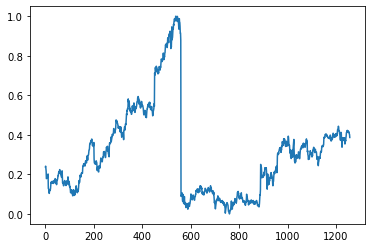

In [60]:
plt.plot(df1)

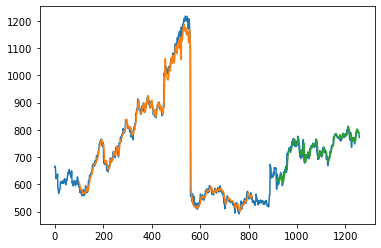

In [61]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#The input of the LSTM is always is a 3D array 
# that what we reshape



In [ ]:
#we are going to do the next 30 day prediction 
# for that we take the predict value and put back to the our orginal list
# (which contain) the normal data

In [62]:
len(test_data)

441

In [63]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [64]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [65]:
temp_input

[0.4044485481581521,
 0.4046828273362457,
 0.40243650345217263,
 0.4013615754585671,
 0.3940575775532984,
 0.39787495004341045,
 0.3945536981657318,
 0.39168722351611707,
 0.38718079461984756,
 0.38708432672298554,
 0.38372173146093735,
 0.38340476551410485,
 0.3835839201797058,
 0.38718079461984756,
 0.3829637694141643,
 0.380152419277042,
 0.3825365544423467,
 0.3862298967793505,
 0.39810922922150405,
 0.398481319680829,
 0.3915494122348857,
 0.36996816559403545,
 0.3828673015173021,
 0.370009508978405,
 0.3738682248528864,
 0.3866433306230448,
 0.38267436572357805,
 0.378291966980417,
 0.3861609911387345,
 0.39278971376596883,
 0.4079351735733088,
 0.40750795860149114,
 0.3900197070132161,
 0.4021470997615866,
 0.40014883618373,
 0.39112219726306785,
 0.39426429447514577,
 0.38774582087289655,
 0.3930791174565549,
 0.39313424196904756,
 0.3936717059658503,
 0.3912186651599301,
 0.4061849703016689,
 0.4022297865303255,
 0.40646059286413183,
 0.3955045960062291,
 0.3959731543624161,
 

In [66]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.40101263]
101
1 day input [0.40468283 0.4024365  0.40136158 0.39405758 0.39787495 0.3945537
 0.39168722 0.38718079 0.38708433 0.38372173 0.38340477 0.38358392
 0.38718079 0.38296377 0.38015242 0.38253655 0.3862299  0.39810923
 0.39848132 0.39154941 0.36996817 0.3828673  0.37000951 0.37386822
 0.38664333 0.38267437 0.37829197 0.38616099 0.39278971 0.40793517
 0.40750796 0.39001971 0.4021471  0.40014884 0.3911222  0.39426429
 0.38774582 0.39307912 0.39313424 0.39367171 0.39121867 0.40618497
 0.40222979 0.40646059 0.3955046  0.39597315 0.39794386 0.41902898
 0.42762841 0.42138555 0.42469303 0.4436283  0.43613136 0.42427959
 0.41915301 0.41918057 0.40425561 0.40297397 0.38242631 0.3733721
 0.37322051 0.40147182 0.41248295 0.40531676 0.37396469 0.36219561
 0.33747227 0.36835577 0.37661067 0.38591293 0.3711809  0.38311536
 0.38183372 0.37180106 0.37275195 0.38179237 0.38537547 0.36773562
 0.35378912 0.35734465 0.37390957 0.3692102  0.38585781 0.39306534
 0.41080165 0.41077409 0.4201866  0

In [67]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [68]:
len(df1)

1258

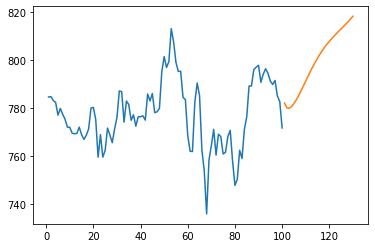

In [70]:
plt.plot(day_new,scalar.inverse_transform(df1[1158:]))
plt.plot(day_pred,scalar.inverse_transform(lst_output))

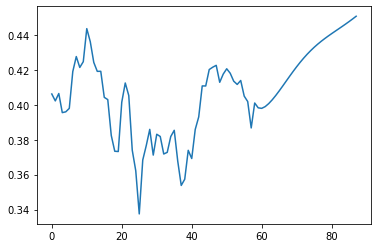

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])